KNN (K-nearest neighbours) can be implemented for solving a classficiation problem. \
Therefore, it depends on finding the closest data from k points using the Euclidean distance (could be other distance formulae)
$$d(p, q) = \sqrt{\sum_{i=1}^{n}(p_{i} - q_{i})^{2}}$$
where p and q are cartesian coordinates. \
Once the distances from a new point is figured out, we can find determine the class \
from whichever points are closest to the classes overall.
To make sure k has no ties (not guarenteed), k has to be odd.
Since there will be no error function, we will use an accuracy score to track how k the value chosen is.

In [2]:
import requests
import pandas as pd
import io

download = requests.get(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
).content
df = pd.read_csv(io.StringIO(download.decode("utf-8")))
dataset = df.values
df.loc[-1] = [
    float(column) if i != df.columns.size - 1 else column
    for i, column in enumerate(df.columns)
]
df.index = df.index + 1
df = df.sort_index()
# all in cm
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
X = df.drop(columns="species").values
y = df["species"].values
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)
X_test.shape

(75, 4)

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import math
from statistics import mode


class KNN:
    def __init__(self, k=3):
        self.k = k

    def euclidean_distance(self, p, q):
        return math.sqrt(np.sum((p - q) ** 2))

    def closest_arg_points_from_point(self, X: np.ndarray, point: np.ndarray):
        n = len(X)
        output = [self.euclidean_distance(point, X[i]) for i in range(n)]
        return np.argsort(output)[: self.k]

    def predict(self, X: np.ndarray, y: np.ndarray, point: np.ndarray):
        output = self.closest_arg_points_from_point(X, point)
        return mode(y[output])

def average(y_hat: np.ndarray, y: np.ndarray):
    return sum([int(y_hat[i] == y[i]) for i in range(len(y))]) / len(y) * 100

model = KNN(1)
classification_numbers = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
for k in range(1, 21, 2):
    model.k = k
    results = []
    for i in range(len(X_test)):
        y_hat = model.predict(X_train, y_train, X_test[i])
        results.append(classification_numbers[y_hat])
    results = np.array(results)

    print(f"the average: {average([classification_numbers[y] for y in y_test], results)}% with k = {k}")

the average: 97.33333333333334% with k = 1
the average: 97.33333333333334% with k = 3
the average: 94.66666666666667% with k = 5
the average: 94.66666666666667% with k = 7
the average: 96.0% with k = 9
the average: 96.0% with k = 11
the average: 96.0% with k = 13
the average: 97.33333333333334% with k = 15
the average: 96.0% with k = 17
the average: 96.0% with k = 19


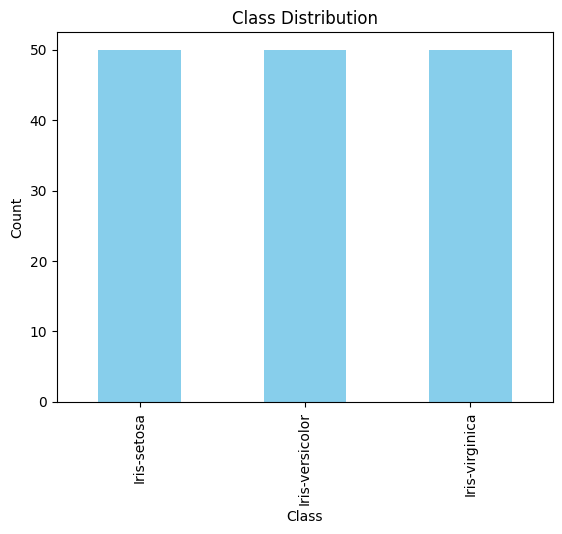

In [5]:
# Count the occurrences of each class
class_counts = df["species"].value_counts()

# Plot the bar graph
class_counts.plot(kind="bar", color="skyblue")

# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")

# Show the plot
plt.show()